## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv",
                   sep=",")
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [6]:
quantitative_features = ["duration", "amount", "age"]
binary_features = ["people_liable", "telephone", "foreign_worker", "credit_risk"]
ordinal_features = ["status", "savings", "employment_duration", "installment_rate", "present_residence", "number_credits"]
categorical_features = ["credit_history", "purpose", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing", "job"]
print("Количественные признаки: ", quantitative_features)
print("Бинарные признаки: ", binary_features)
print("Порядковые признаки: ", ordinal_features)
print("Категориальные признаки: ", categorical_features)

Количественные признаки:  ['duration', 'amount', 'age']
Бинарные признаки:  ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
Порядковые признаки:  ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
Категориальные признаки:  ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
data.groupby(["purpose"])["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
print("Процент клиентов моложе 30 лет, которые снимают жилье: ", len(data[(data["age"] < 30)&(data["housing"] == "rent")]) / len(data) * 100)

Процент клиентов моложе 30 лет, которые снимают жилье:  24.6


In [9]:
print("Процент клиентов старше 40 лет, которые снимают жилье: ", len(data[(data["age"] > 40)&(data["housing"] == "rent")]) / len(data) * 100)

Процент клиентов старше 40 лет, которые снимают жилье:  18.5


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
print("Иностранцы с числом кредитов больше 3: ",len(data[(data["foreign_worker"] == "yes")&(data["number_credits"].isin(['4-5', '>= 6']))]))

Иностранцы с числом кредитов больше 3:  1


### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

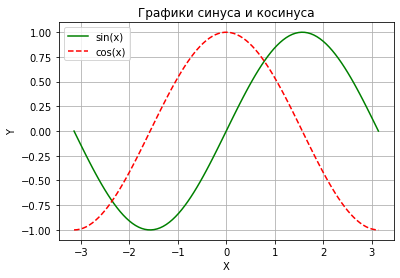

In [12]:
x = np.linspace(-np.pi, np.pi, 100) 
y_sin = np.sin(x)
y_cos = np.cos(x)
fig, ax = plt.subplots()
ax.plot(x, y_sin, color = 'green', label="sin(x)")
ax.plot(x, y_cos, color = 'red', linestyle = '--', label="cos(x)")
plt.grid()
plt.title("Графики синуса и косинуса")
plt.xlabel("X")
plt.ylabel('Y')
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

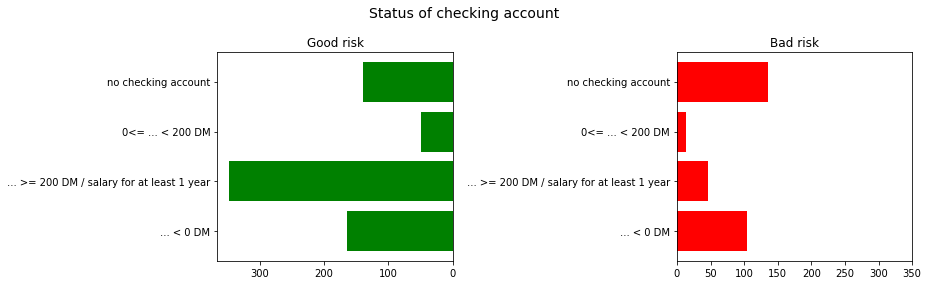

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, tight_layout = True)
df = data.groupby(['credit_risk', 'status']).agg(count =("credit_risk", "count"))
df = df.reset_index()
ax1.barh(df[(df['credit_risk'] == 'good')]['status'], df[(df['credit_risk'] == 'good')]['count'], color = "green")
ax2.barh(df[(df['credit_risk'] == 'bad')]['status'], df[(df['credit_risk'] == 'bad')]['count'], color = "red")
ax1.invert_xaxis()
fig.suptitle("Status of checking account", fontsize=14)
ax1.set_title('Good risk')
ax2.set_title('Bad risk')
ax2.set_xlim([0, 350])
fig.set_figwidth(13)
fig.set_figheight(4)

Большая часть положительных кейсов  - это люди с наибольшим размером текущего счета, в то время как у большинства клиентов с большим кредитным риском текущий счет отсутствует.

### Задание 8  (0.5 балла)

In [14]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

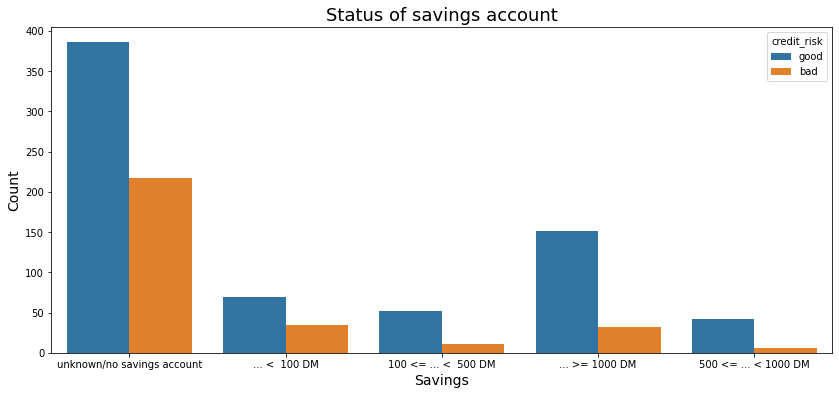

In [15]:
plt.figure(figsize=(14, 6))
sns.countplot(x="savings", 
            hue="credit_risk", 
            data=data)
plt.ylabel("Count", size=14)
plt.xlabel("Savings", size=14)
plt.title("Status of savings account", fontsize=18)
plt.show()

Отсутствие сберегательного счета у клиента не может говорить о его высоком кредитном риске, поскольку у большей части положительных кейсов сберегательного счета нет. Однако если у клиента существует сберегательный счет, то в большинстве случаев это говорит о положительном кейсе (чем больше сберегательный счет, тем больше разрыв)

С точки зрения трудоемкости написания кода seaborn кажется проще, поскольку для создания гистрограммы при помощи matplotlib пришлось создавать дополнительный dataframe. На обоих графиках информация воспринимается одинаково просто.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

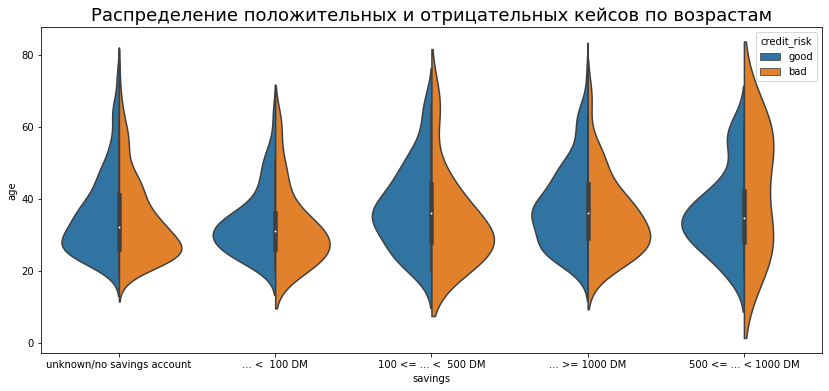

In [16]:
plt.figure(figsize=(14, 6))
sns.violinplot(x="savings", y="age", data = data, hue='credit_risk', split = True)
plt.title("Распределение положительных и отрицательных кейсов по возрастам", fontsize=18)
plt.show()

Возраст подавляющего числа клиентов составляет 20-40 лет. Среди обладателей сберегательного счера размера (500 <= ...  < 1000) распространены случаи, когда пожилые люди (около 70 лет) не выплачивают кредиты.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

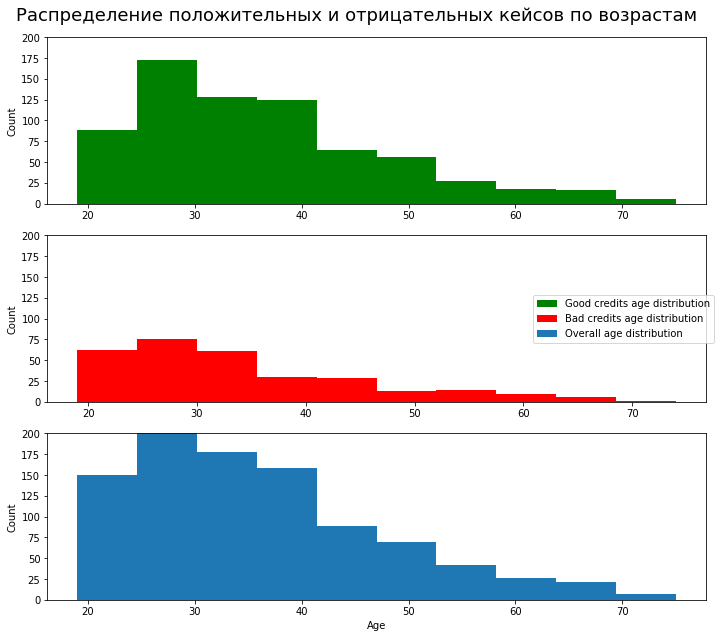

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, tight_layout = True, figsize = (10, 9))
df_good = data[(data["credit_risk"] == "good")]["age"].values.tolist()
df_bad = data[(data["credit_risk"] == "bad")]["age"].values.tolist()
df_all = data["age"].values.tolist()
ax1.hist(df_good, color = "green", label = "Good credits age distribution")
ax2.hist(df_bad, color = "red", label = "Bad credits age distribution")
ax3.hist(df_all, label = "Overall age distribution")
ax1.set_ylim([0, 200])
ax2.set_ylim([0, 200])
ax3.set_ylim([0, 200])
fig.legend(loc = "right")
plt.xlabel("Age")
ax1.set_ylabel("Count")
ax2.set_ylabel("Count")
ax3.set_ylabel("Count")
fig.suptitle("Распределение положительных и отрицательных кейсов по возрастам", fontsize=18)
plt.show()

Ситуация такая же, как и на предыдущем графике: возраст большинства клиентов 20-40 лет. Наибольшее число положительных кейсов приходится на 25-30 лет. Также можно утверждать, что на промежутке 35-40 лет наблюдается намного больше положительный кейсов, чем отрицательных. 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

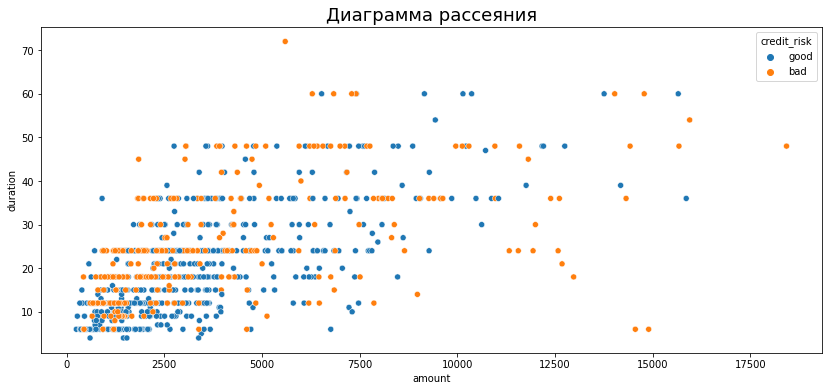

In [18]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x="amount", y="duration", hue = "credit_risk")
plt.title("Диаграмма рассеяния", fontsize=18)
plt.show()

На диаграмме рассеивания видно, что большая часть кредитов бралась на маленькую сумму и на короткий срок. Однако можно заметить несколько отрицательных кейсов, когда клиент берет кредит большого объема на короткий срок.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

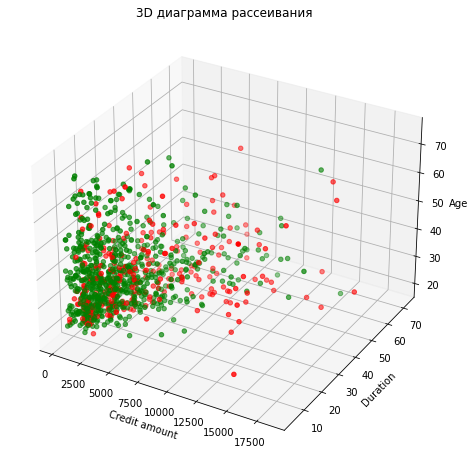

In [19]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection = '3d')
label_color = {"good":"green", "bad":"red"}
x = data['amount']
y = data['duration']
z = data['age']
ax.scatter(x, y, z, c = data["credit_risk"].map(label_color))
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.title("3D диаграмма рассеивания")
plt.show()

На 3D диаграмме рассеивания также видно, что большАя часть отрицательных кейсов связана с большим объемом денег, малым сроком и молодым возрастом.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [20]:
data_ordinal_binary = data.drop(categorical_features, axis = 1)
data_ordinal_binary = data_ordinal_binary.drop(quantitative_features, axis = 1)
data_ordinal_binary = data_ordinal_binary.apply(lambda x: pd.factorize(x)[0])
categorical_dummies = pd.get_dummies(data[categorical_features])
data_new = pd.concat([data_ordinal_binary, categorical_dummies], axis = 1)
data_new = pd.concat([data_new, data[quantitative_features]], axis = 1)
data_new.head(10)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,telephone,foreign_worker,credit_risk,...,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,duration,amount,age
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,18,1049,21
1,0,0,1,1,1,1,1,0,0,0,...,1,0,0,0,1,0,0,9,2799,36
2,1,1,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,12,841,23
3,0,0,1,2,1,1,1,0,1,0,...,1,0,0,0,0,0,1,12,2122,39
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,12,2171,38
5,0,0,0,3,2,1,1,0,1,0,...,1,0,0,0,0,0,1,10,2241,48
6,0,0,2,3,0,1,0,0,1,0,...,0,0,1,0,0,0,1,8,3398,39
7,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,6,1361,40
8,2,0,3,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,18,1098,65
9,1,2,3,3,0,0,0,0,0,0,...,1,0,0,0,0,1,0,24,3758,23


In [21]:
data_new.nunique()

status                                                          4
savings                                                         5
employment_duration                                             5
installment_rate                                                4
present_residence                                               4
number_credits                                                  4
people_liable                                                   2
telephone                                                       2
foreign_worker                                                  2
credit_risk                                                     2
credit_history_all credits at this bank paid back duly          2
credit_history_critical account/other credits elsewhere         2
credit_history_delay in paying off in the past                  2
credit_history_existing credits paid back duly till now         2
credit_history_no credits taken/all credits paid back duly      2
purpose_bu

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [22]:
def predict(Xtest: np.array) -> np.array:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

IndentationError: expected an indented block (<ipython-input-22-7af24d906a02>, line 4)